In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
import pickle

import warnings 
warnings.simplefilter("ignore")


In [3]:
# Loading dataset
df = pd.read_csv("./data/language_detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
df['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [5]:
# Separating the independent and dependent features
X = df["Text"]
y = df["Language"]

In [6]:
# Converting Categorical variables to numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
# Text Preprocessing
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

# Showing created data list
data_list

[' nature  in the broadest sense  is the natural  physical  material world or universe.',
 ' nature  can refer to the phenomena of the physical world  and also to life in general.',
 'the study of nature is a large  if not the only  part of science.',
 'although humans are part of nature  human activity is often understood as a separate category from other natural phenomena.',
 '[ ] the word nature is borrowed from the old french nature and is derived from the latin word natura  or  essential qualities  innate disposition   and in ancient times  literally meant  birth .',
 '[ ] in ancient philosophy  natura is mostly used as the latin translation of the greek word physis  φύσις   which originally related to the intrinsic characteristics that plants  animals  and other features of the world develop of their own accord.',
 '[ ][ ]  the concept of nature as a whole  the physical universe  is one of several expansions of the original notion [ ] it began with certain core applications of th

In [8]:
# Words list
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(10337, 39404)

In [9]:
# Train & Test Split 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
# Model Creation & Prediction 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [11]:
# Prediction from test dataset 
y_pred = model.predict(x_test)

In [12]:
# Evaluating the model 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred )
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Model's accuracy_score is", ac)


Model's accuracy_score is 0.9758220502901354


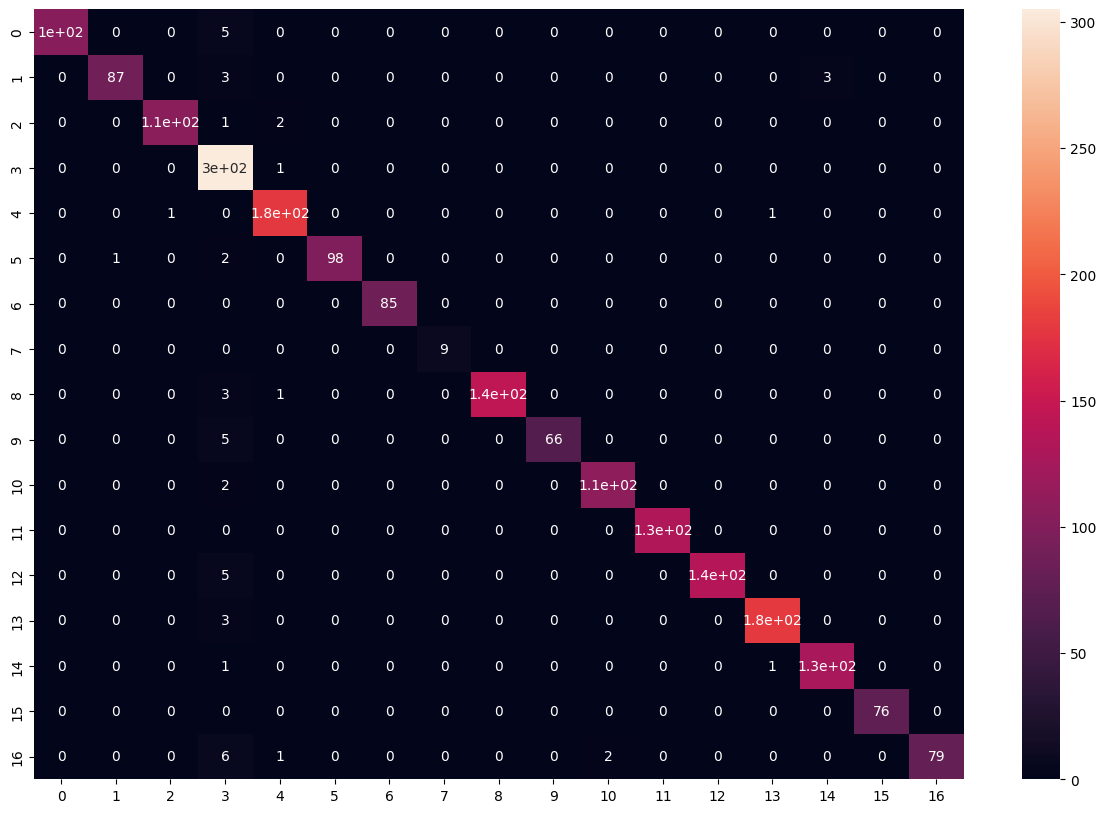

In [13]:
# Confusion Matrix 
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.show()

In [14]:
print("Model's classification_report is", cr)

Model's classification_report is               precision    recall  f1-score   support

           0       1.00      0.95      0.98       109
           1       0.99      0.94      0.96        93
           2       0.99      0.97      0.98       109
           3       0.89      1.00      0.94       306
           4       0.97      0.99      0.98       180
           5       1.00      0.97      0.98       101
           6       1.00      1.00      1.00        85
           7       1.00      1.00      1.00         9
           8       1.00      0.97      0.99       147
           9       1.00      0.93      0.96        71
          10       0.98      0.98      0.98       111
          11       1.00      1.00      1.00       132
          12       1.00      0.96      0.98       140
          13       0.99      0.98      0.99       182
          14       0.98      0.98      0.98       129
          15       1.00      1.00      1.00        76
          16       1.00      0.90      0.95     

In [16]:
# Model saving 
pickle.dump(cv, open("transform.pkl","wb"))
pickle.dump(model, open("model-0.1.0.pkl","wb"))
